# Import clean dataframe and libraries for EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import sklearn.metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## While I understand the majority of above libraries won't be used for EDA, I want to be in the habit of importing all necessary libraries!

In [5]:
df=pd.read_csv('clean.csv')
df.head(25)

,Unnamed: 0,ID,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,...,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month
0,1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,7.0,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,9.0,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
Unnamed: 0                    30000 non-null int64
ID                            30000 non-null float64
credit_limit                  30000 non-null float64
sex                           30000 non-null float64
education                     30000 non-null float64
marriage                      30000 non-null float64
age                           30000 non-null float64
sep_status                    30000 non-null float64
aug_status                    30000 non-null float64
july_status                   30000 non-null float64
june_status                   30000 non-null float64
may_status                    30000 non-null float64
april_status                  30000 non-null float64
balance_sep                   30000 non-null float64
balance_aug                   30000 non-null float64
balance_july                  30000 non-null float64
balance_june                  30000 non-null 

In [8]:
df.shape

(30000, 26)

In [9]:
df.describe()

,Unnamed: 0,ID,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,...,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
del df['Unnamed: 0']

In [12]:
df.head()

,ID,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,june_status,...,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null float64
credit_limit                  30000 non-null float64
sex                           30000 non-null float64
education                     30000 non-null float64
marriage                      30000 non-null float64
age                           30000 non-null float64
sep_status                    30000 non-null float64
aug_status                    30000 non-null float64
july_status                   30000 non-null float64
june_status                   30000 non-null float64
may_status                    30000 non-null float64
april_status                  30000 non-null float64
balance_sep                   30000 non-null float64
balance_aug                   30000 non-null float64
balance_july                  30000 non-null float64
balance_june                  30000 non-null float64
balance_may                   30000 non-nul

In [19]:
df_cop = df.copy()

In [20]:
del df_cop['ID']

In [21]:
cats = []
conts = []

for col in df_cop.columns:
    if df_cop[col].nunique() <= 100:
        cats.append(col)
    else:
        conts.append(col);

print (cats)
print (conts)

['credit_limit', 'sex', 'education', 'marriage', 'age', 'sep_status', 'aug_status', 'july_status', 'june_status', 'may_status', 'april_status', 'default payment next month']
['balance_sep', 'balance_aug', 'balance_july', 'balance_june', 'balance_may', 'balance_april', 'amt_paid_sep', 'amt_paid_aug', 'amt_paid_july', 'amt_paid_june', 'amt_paid_may', 'amt_paid_april']


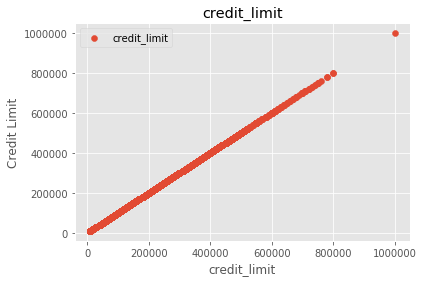

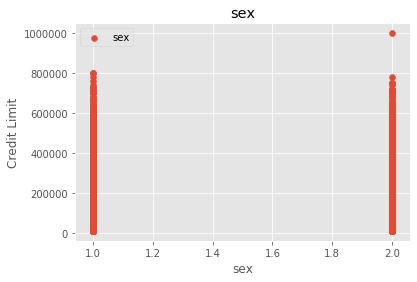

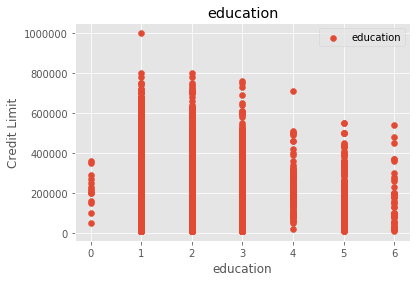

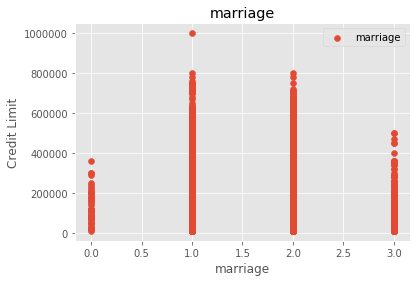

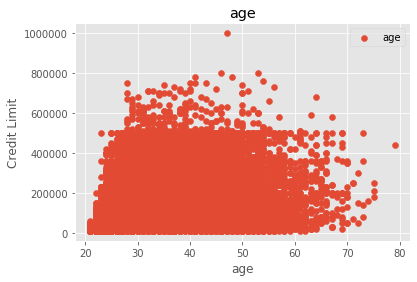

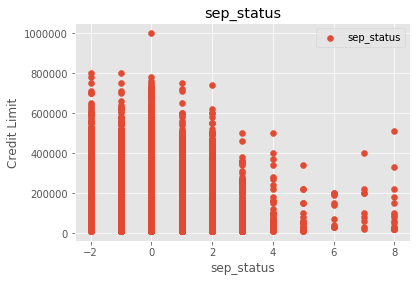

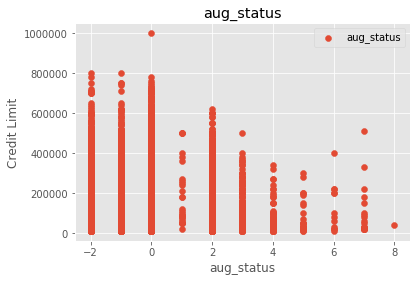

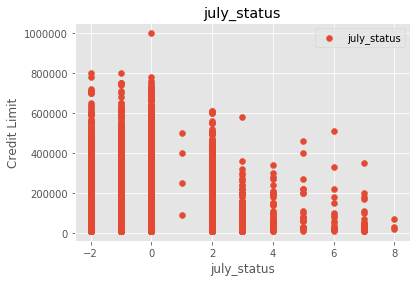

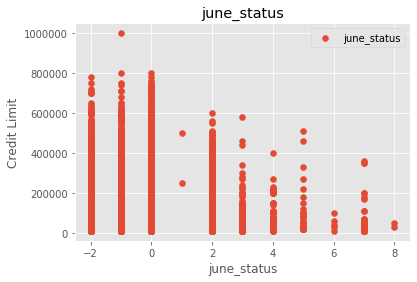

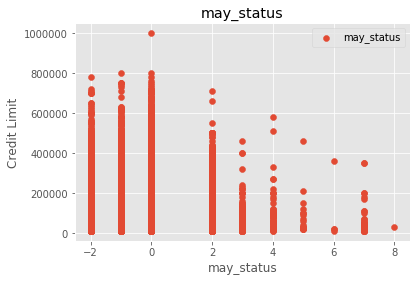

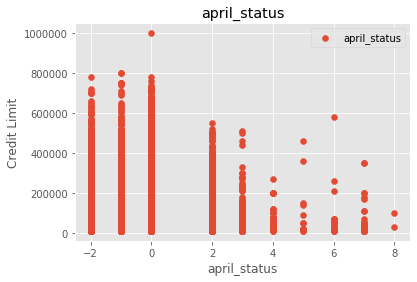

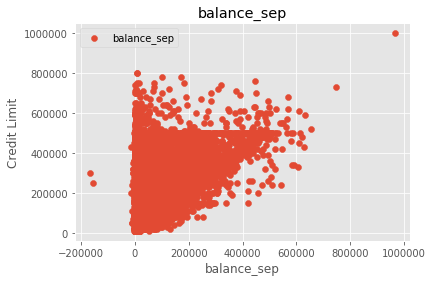

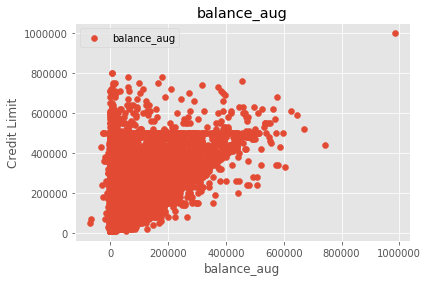

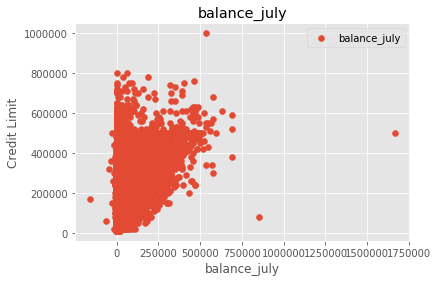

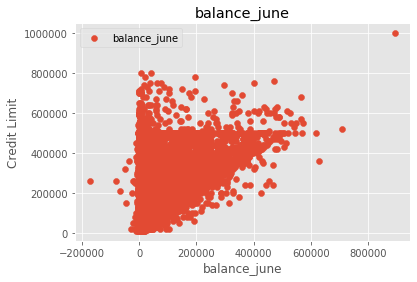

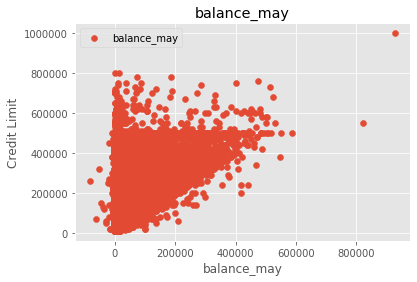

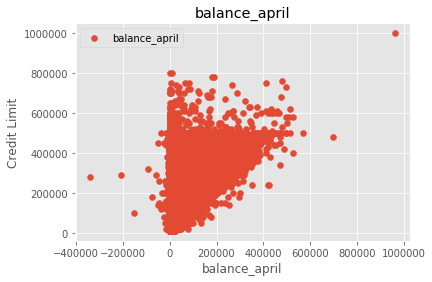

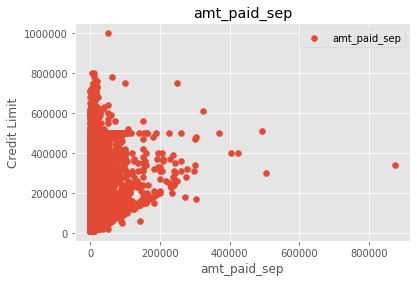

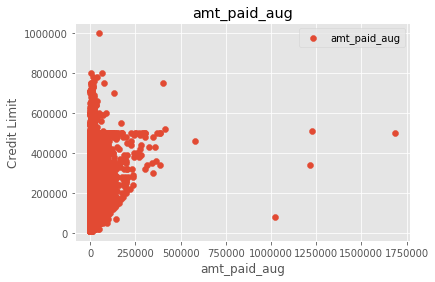

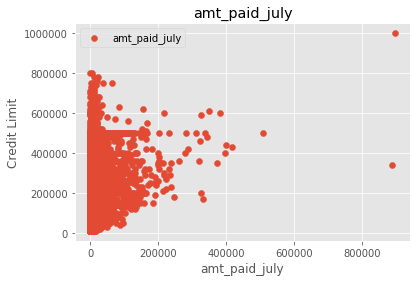

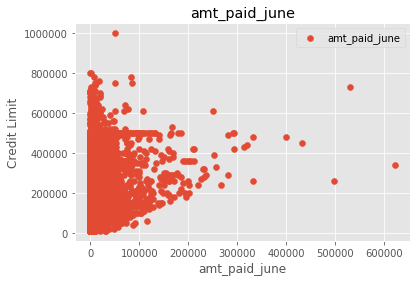

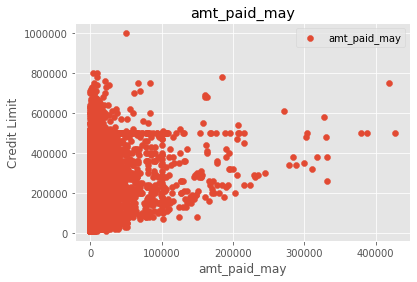

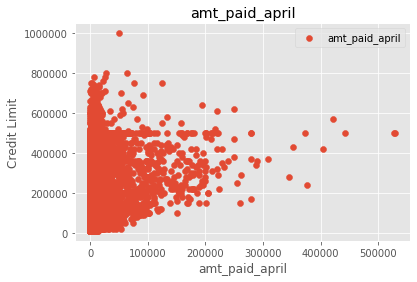

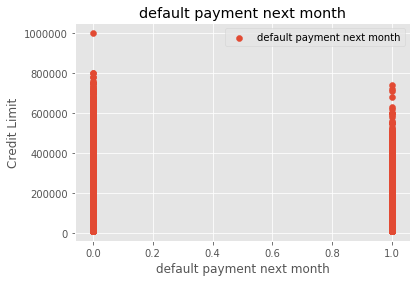

In [34]:
for col in df_cop.columns:
    plt.scatter(df_cop[col], df_cop['credit_limit'], label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Credit Limit')
    plt.title(col)
    plt.show()

In [41]:
df_cop.head()

,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,june_status,may_status,...,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### Describe the categorical variables


In [40]:
df_cop[['sex', 'education', 'marriage', 'age']].describe()

,sex,education,marriage,age
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


### Nothing we haven't already covered but let's review for the sake of EDA:

- Majority of sex = 2 (female)
- Median and 3rd Quartile of education = 2 (undergraduate)
- Median and 3rd Quartile of marriage = 2 (married)
- Regarding Age:
    - Minimum: 21
    - 1st Quartile: 28
    - Median Age: 34
    - 3rd Quartile: 41
    - Maximum Age: 79

### Regarding Payment Status in each Month:


In [45]:
df_cop[['sep_status', 'aug_status', 'july_status', 'june_status',
       'may_status', 'april_status']].describe()

,sep_status,aug_status,july_status,june_status,may_status,april_status
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


### Of note re payment status:
- In the 1st Quartile of each month: people are paid in full
- The median and 3rd Quartile reflect people using revolving credit
- The maximum in each month are folks who are 8 months late in payments. 

### Regarding Credit Balance in each Month:


In [42]:
df_cop[['balance_sep', 'balance_aug', 'balance_july', 'balance_june',
       'balance_may', 'balance_april']].describe()

,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


- September has the highest values in nearly each category:
    - 1st Q: 3558 
    - median: 22,381
    - 3rd Q: 67091
    - Max: Only category Sep does not have highest value
        - July has highest at 1.664 e+06 
- Examining the minimum it seems that there are negative values. Is this credit?

### Regarding Amount Paid Each Month:

In [44]:
df_cop[['amt_paid_sep', 'amt_paid_aug', 'amt_paid_july', 'amt_paid_june',
       'amt_paid_may', 'amt_paid_april']].describe()

,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


- To nobody's surprise: Minimum for each month = 0
- 1st Q for each month:
    - Sep: 1000
    - August:833
    - July: 390
    - June: 296
    - May: 252
    - April: 117.75
- Median for each month:
    - Sep: 2100
    - August: 2009
    - July: 1800
    - June: 1500
    - May: 1500:
    - April: 1500
    - THOUGHT: Perhaps 1500 is the mandatory minimum for the majority of folks?
- 3rd Q for each month:
    - Sep: 5006
    - Aug: 5000
    - July: 4505
    - June: 4013.25
    - May: 4031.5
    - April: 4000
- Max for each month:
    - Sep: 873552 (Each of these seem like folks paying off a whole debt?)
    - Aug: 1.68M
    - July: 896040
    - June: 621000
    - May: 426529
    - April: 528666

## Given this data, what is the basic probability that someone will default on their payment?

In [49]:
df_cop['default payment next month'].sum() /len(df_cop['default payment next month'])

0.2212

### Answer: 22%

# Some further preprocessing: one-hot encode the categorical variables

In [50]:
df2 = df_cop.copy()

In [51]:
df2.head()

,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,june_status,may_status,...,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [52]:
df2['age_bins'] = pd.cut(x=df2['age'], bins=[20, 29, 39, 49,59,69,79])

In [53]:
pd.set_option('display.max_columns', 500)

In [54]:
df2.head()

,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month,age_bins
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,"(20, 29]"
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,"(20, 29]"
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,"(29, 39]"
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,"(29, 39]"
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,"(49, 59]"


In [55]:
df2['age_bins'].unique()

[(20, 29], (29, 39], (49, 59], (39, 49], (59, 69], (69, 79]]
Categories (6, interval[int64]): [(20, 29] < (29, 39] < (39, 49] < (49, 59] < (59, 69] < (69, 79]]

In [56]:
df2['age_by_decade'] = pd.cut(x=df2['age'], bins=[20, 29, 39, 49,59,69,79], labels=['20s', '30s', '40s', '50s','60s','70s'])

In [57]:
df2.head()

,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month,age_bins,age_by_decade
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,"(20, 29]",20s
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,"(20, 29]",20s
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,"(29, 39]",30s
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,"(29, 39]",30s
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,"(49, 59]",50s


In [58]:
del df2['age']

In [59]:
del df2['age_bins']

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
credit_limit                  30000 non-null float64
sex                           30000 non-null float64
education                     30000 non-null float64
marriage                      30000 non-null float64
sep_status                    30000 non-null float64
aug_status                    30000 non-null float64
july_status                   30000 non-null float64
june_status                   30000 non-null float64
may_status                    30000 non-null float64
april_status                  30000 non-null float64
balance_sep                   30000 non-null float64
balance_aug                   30000 non-null float64
balance_july                  30000 non-null float64
balance_june                  30000 non-null float64
balance_may                   30000 non-null float64
balance_april                 30000 non-null float64
amt_paid_sep                  30000 non-nul

In [61]:
# Label the rest of the categorical variables as categorical 

df2["sex"] = df2["sex"].astype('category')
df2["education"] = df2["education"].astype('category')
df2["marriage"] = df2["marriage"].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
credit_limit                  30000 non-null float64
sex                           30000 non-null category
education                     30000 non-null category
marriage                      30000 non-null category
sep_status                    30000 non-null float64
aug_status                    30000 non-null float64
july_status                   30000 non-null float64
june_status                   30000 non-null float64
may_status                    30000 non-null float64
april_status                  30000 non-null float64
balance_sep                   30000 non-null float64
balance_aug                   30000 non-null float64
balance_july                  30000 non-null float64
balance_june                  30000 non-null float64
balance_may                   30000 non-null float64
balance_april                 30000 non-null float64
amt_paid_sep                  30000 non-

In [62]:
df2.age_by_decade.value_counts(normalize=True)

30s    0.374600
20s    0.320600
40s    0.215467
50s    0.078033
60s    0.010467
70s    0.000833
Name: age_by_decade, dtype: float64

In [63]:
one_hot_df = pd.get_dummies(df2)
one_hot_df.head()

,credit_limit,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month,sex_1.0,sex_2.0,education_0.0,education_1.0,education_2.0,education_3.0,education_4.0,education_5.0,education_6.0,marriage_0.0,marriage_1.0,marriage_2.0,marriage_3.0,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s
0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [64]:
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
credit_limit                  30000 non-null float64
sep_status                    30000 non-null float64
aug_status                    30000 non-null float64
july_status                   30000 non-null float64
june_status                   30000 non-null float64
may_status                    30000 non-null float64
april_status                  30000 non-null float64
balance_sep                   30000 non-null float64
balance_aug                   30000 non-null float64
balance_july                  30000 non-null float64
balance_june                  30000 non-null float64
balance_may                   30000 non-null float64
balance_april                 30000 non-null float64
amt_paid_sep                  30000 non-null float64
amt_paid_aug                  30000 non-null float64
amt_paid_july                 30000 non-null float64
amt_paid_june                 30000 non-nul

In [65]:
df3 = one_hot_df.copy()

In [66]:
df3.rename(columns={'sex_1.0':'male', 'sex_2.0':'female','education_0.0': 'other_ed_1', 
                    'education_1.0' : 'grad_school','education_2.0': 'undergrad', 
                    'education_3.0':'high_school', 'education_4.0' : 'other__ed_2',
                    'education_5.0' : 'other_ed_3','education_6.0' : 'other_ed_4', 
                    'marriage_0.0' : 'marriage_other','marriage_1.0' : 'single', 
                    'marriage_2.0': 'married', 'marriage_3.0' : 'divorced',
                    'age_by_decade_20s':'20s','age_by_decade_30s':'30s',
                    'age_by_decade_40s':'40s', 'age_by_decade_50s' : '50s',
                    'age_by_decade_60s' : '60s', 'age_by_decade_70s' : '70s'},
              inplace=True)
df3.head()

,credit_limit,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month,male,female,other_ed_1,grad_school,undergrad,high_school,other__ed_2,other_ed_3,other_ed_4,marriage_other,single,married,divorced,20s,30s,40s,50s,60s,70s
0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [71]:
df3.describe()

,credit_limit,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month,male,female,other_ed_1,grad_school,undergrad,high_school,other__ed_2,other_ed_3,other_ed_4,marriage_other,single,married,divorced,20s,30s,40s,50s,60s,70s
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.396267,0.603733,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.001800,0.455300,0.532133,0.010767,0.320600,0.374600,0.215467,0.078033,0.010467,0.000833
std,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.489129,0.489129,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.042389,0.498006,0.498975,0.103204,0.466715,0.484028,0.411153,0.268229,0.101772,0.028856
min,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
del df3['other_ed_1']

In [74]:
del df3['other__ed_2']

In [75]:
del df3['other_ed_3']

In [76]:
del df3['other_ed_4']

In [77]:
del df3['marriage_other']

In [78]:
df3.to_csv('final_clean.csv')